## RELATIONSHIPS BETWEEN MEAN, MEDIAN and MODE in SPECIAL DISTRIBUTIONS

* Mean is equal to the average of all the numbers.
* The mode is the number ( or numbers) repeated the most among other numbers.
* Median is derived by sorting the numbers and then choose either the middle one or the average of the two middle numbers.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats



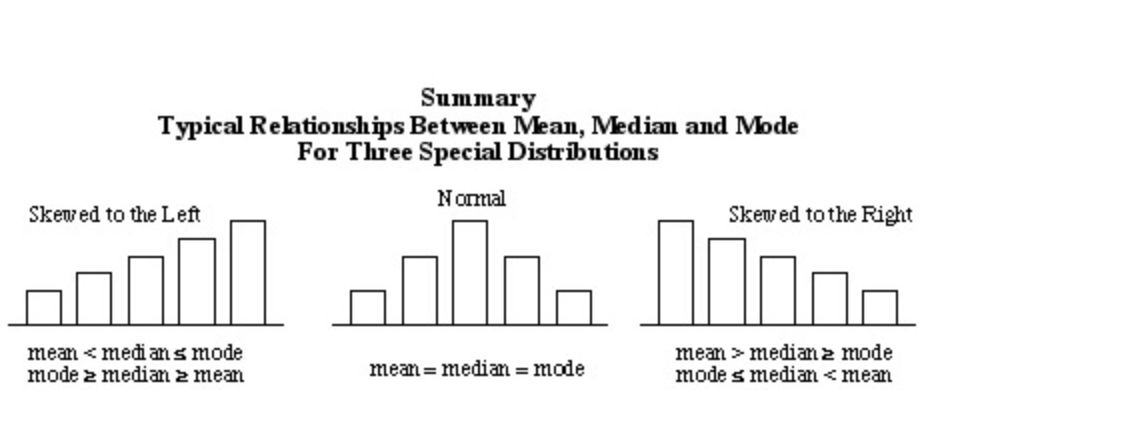

In [58]:
data=pd.read_csv("lending_club_loan_dataset.csv")
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


### Right Skewed - Mean > Median > Mode

In [59]:
data['annual_inc'].describe()

count      20000.000000
mean       73349.578350
std        45198.567255
min         8412.000000
25%        47000.000000
50%        65000.000000
75%        88000.000000
max      1000000.000000
Name: annual_inc, dtype: float64

In [89]:
def stats(x):
    print(f"Variable: {x}")
    print(f"Type of variable: {data[x].dtype}")
    print(f"Total observations: {data[x].shape[0]}")
    detect_null_val = data[x].isnull().values.any()
    if detect_null_val:
        print(f"Missing values: {data[x].isnull().sum()} ({(data[x].isnull().sum() / data[x].isnull().shape[0] *100).round(2)}%)")
    else:
        print(f"Missing values? {data[x].isnull().values.any()}")
    print(f"Unique values: {data[x].nunique()}")
    if data[x].dtype != "O":
        print(f"Min: {int(data[x].min())}")
        print(f"25%: {int(data[x].quantile(q=[.25]).iloc[-1])}")
        print(f"Median: {int(data[x].median())}")
        print(f"75%: {int(data[x].quantile(q=[.75]).iloc[-1])}")
        print(f"Max: {int(data[x].max())}")
        print(f"Mean: {data[x].mean()}")
        print(f"Mode: {data[x].mode()[0]}")
        print(f"Std dev: {data[x].std()}")
        print(f"Variance: {data[x].var()}")
        print(f"Skewness: {scipy.stats.skew(data[x])}")
        print(f"Kurtosis: {scipy.stats.kurtosis(data[x])}")
        print("")
        
        # Percentiles 1%, 5%, 95% and 99%
        print("Percentiles 1%, 5%, 95%, 99%")
        display(data[x].quantile(q=[.01, .05, .95, .99]))
        print("")
    else:
        print(f"List of unique values: {data[x].unique()}")

In [85]:
def display_dist(var):
    sns.histplot(df[var])
    mean=df[var].mean()
    median=df[var].median()
    mode=df[var].mode()[0]
    measurements = [mode, median, mean]
    names = ["mode", "median", "mean"]
    colors = ['green', 'blue', 'orange']
    for measurement, name, color in zip(measurements, names, colors):
        plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
    plt.legend();

Variable: annual_inc
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 2566
Min: 8412
25%: 47000
Median: 65000
75%: 88000
Max: 1000000
Mean: 73349.57835
Mode: 60000.0
Std dev: 45198.567254725625
Variance: 2042910481.8799553
Skewness: 5.275648123592321
Kurtosis: 66.72665803201564

Percentiles 1%, 5%, 95%, 99%


0.01     20519.5
0.05     30000.0
0.95    145000.0
0.99    225000.0
Name: annual_inc, dtype: float64

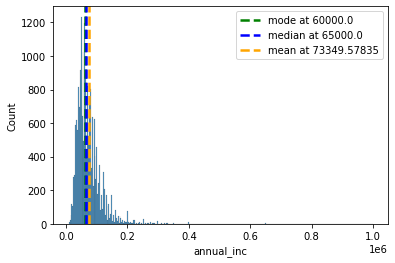

In [92]:
## Column Description: The self-reported annual income provided by the borrower during registration.

stats('annual_inc')
display_dist('annual_inc')

Examples:
1. Income Distribution
2. Lentghs of Comments
3. Cricket Score
4. Eaxm Score
5. Taxation Regime

### Left Skewed - Mean < Median < Mode

Variable: emp_length_num
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 12
Min: 0
25%: 3
Median: 7
75%: 11
Max: 11
Mean: 6.8214
Mode: 11
Std dev: 3.7742302898358013
Variance: 14.244814280714037
Skewness: -0.27964924120655704
Kurtosis: -1.3664296257576731

Percentiles 1%, 5%, 95%, 99%


0.01     0.0
0.05     1.0
0.95    11.0
0.99    11.0
Name: emp_length_num, dtype: float64

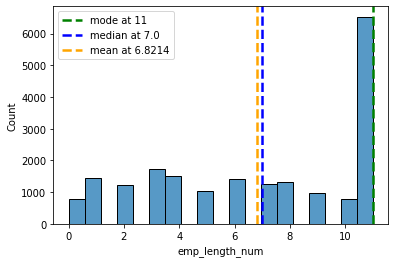

In [90]:
## Column Description: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

stats('emp_length_num')
display_dist('emp_length_num')

Examples:
1. Human Lifecycle
2. Retirement Age
3. Record of Long Jumps at a Competition

### Normal Distribution - Mean = Median = Mode

Variable: dti
Type of variable: float64
Total observations: 20000
Missing values: 154 (0.77%)
Unique values: 3295
Min: 0
25%: 10
Median: 16
75%: 22
Max: 34
Mean: 16.58784137861534
Mode: 15.87
Std dev: 7.585811951545173
Variance: 57.54454296420559
Skewness: nan
Kurtosis: nan

Percentiles 1%, 5%, 95%, 99%


0.01     1.7800
0.05     4.6500
0.95    29.6900
0.99    33.4355
Name: dti, dtype: float64

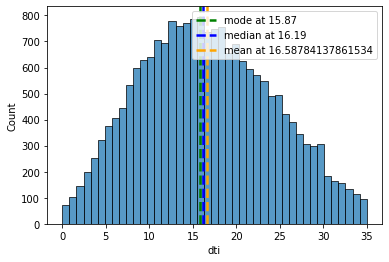

In [91]:
## Column Description:(Debt-To-Income Ratio): A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

stats('dti')
display_dist('dti')

In [ ]:
Example:
1. Height/weight of people
2. Rolling a Dice
3. Tossing a coin
4. IQ